# Biodiversity in National Park
Introduction
The goals are to analyze Biodiversity data from National Park Service, particularly around various species observed in different national park location.

This project will scope, analyze, prepare, plot data, and seek to explain the finding from analysis.

Here are few questions that this project has sought to answer:

What is the distribution of conservation_status for animals?
Are certain types of species more likely to be endangered?
Are the differences between species and their conservation status significant?
Which species were spotted the most at each park?
Data Source
Both observations.csv and species_info.csv was provided by codecademy.com

note : The data for this project is inspired by real data, but is mostly fictional.

Import Python Modules
First import the preliminary modules that will be used in this project:

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [12]:
species = pd.read_csv('species_info.csv')
print(species.head())

  category                scientific_name  \
0   Mammal  Clethrionomys gapperi gapperi   
1   Mammal                      Bos bison   
2   Mammal                     Bos taurus   
3   Mammal                     Ovis aries   
4   Mammal                 Cervus elaphus   

                                        common_names conservation_status  
0                           Gapper's Red-Backed Vole                 NaN  
1                              American Bison, Bison                 NaN  
2  Aurochs, Aurochs, Domestic Cattle (Feral), Dom...                 NaN  
3  Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)                 NaN  
4                                      Wapiti Or Elk                 NaN  


# observations
The observations.csv contains information from recorded sighthing of different species throughout the National Parks in past 7 days. The columns included are:

scientific_name - the scientific name of each species
park_name - the name of the national parks
observation - the number of observations in the past 7 days

In [14]:
observations = pd.read_csv('observations.csv')
observations.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


# Data Characteristics
Next there will be a check for the dimensions of the data sets, for species there are 5,824 rows and 4 columns while observations has 23,296 rows and 3 column

In [16]:
print(f"species shape : {species.shape}")
print(f"observation shape : {observations.shape}")

species shape : (5824, 4)
observation shape : (23296, 3)


# Explore the Data
It is time to explore the species data a little more in depth. The first thing is to find the number of distinct species in the data. Use the column scientific_name to get 5,541 nunique species. There seems to be a lot of species in the national parks!

In [17]:
print(F"number of species : {species.scientific_name.nunique()}")

number of species : 5541


Next is to find the number of category that are represented in the data and there are 7 including animals and plants

In [18]:
print(f"number of categories : {species.category.nunique()}")
print(f"categories : {species.category.unique()}")

number of categories : 7
categories : ['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']


Here is a chance to drill one level deeper and see the counts of category in the data. Vascular plants are by far the largest share of species with 4,470 in the data with reptiles being the fewest with 79.

In [19]:
print(species.groupby('category').size().reset_index())


            category     0
0          Amphibian    80
1               Bird   521
2               Fish   127
3             Mammal   214
4  Nonvascular Plant   333
5            Reptile    79
6     Vascular Plant  4470


Another column to explore is conservation_status. The column has 4 categories, Species of Concern, Endangered, Threatened, In Recovery and Nan values.

In [20]:
print(f"num of conservation statuses : {species.conservation_status.nunique()}")
print(f"conservation statuses : {species.conservation_status.unique()}")

num of conservation statuses : 4
conservation statuses : [nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']


Next count the number of observations in the breakdown of the categories conservation_status is done. There are 5,633 nan values which means they are species without concern. On the other hand there are 161 species of concern, 16 endangered, 10 threatened, and 4 in recovery.

Note : In the most coming across nan values must be treated carefully, but the absence of this data means that these species are not under any conservation status.

In [21]:
print(f"na values : {species.conservation_status.isna().sum()}")
print(species.groupby('conservation_status').size().reset_index())

na values : 5633
  conservation_status    0
0          Endangered   16
1         In Recovery    4
2  Species of Concern  161
3          Threatened   10


# observation
The next section looks at observation data. The first task is to check the number of parks that are in the data dataset and there are only 4 national parks.

In [22]:
print(F"num of parks : {observations.park_name.nunique()}")
print(f"parks : {observations.park_name.unique()}")

num of parks : 4
parks : ['Great Smoky Mountains National Park' 'Yosemite National Park'
 'Bryce National Park' 'Yellowstone National Park']


here are the total number of observations logged in the parks, there are 3,314,739 sighthing in the last 7 days...that's a lot of observations.

In [23]:
print(F"number of observations : {observations.observations.sum()}")

number of observations : 3314739


# Analysis
First task will be to clean and explore the conservation_status column in species.

The column conservation_status has several possible values:

Species of Concern : declining or appear to be in need of conservation
Endangered : vurnarable to endangerment in the near future
Threatened : seriously at risk of extinction
In Recovery : formerly Endangered, but currently neither in danger of extinction throughout all or a significant portion of its range
In the exploration, a lot of nan values were detected. These values will need to be converted to No Intervention.

In [24]:
species.fillna('No Intervention', inplace=True)
species.groupby('conservation_status').size().reset_index()

,conservation_status,0
0,Endangered,16
1,In Recovery,4
2,No Intervention,5633
3,Species of Concern,161
4,Threatened,10


Next is to checkout the different categories that are nested in the conservation_status column except for the ones that do not require an intervention. There is both the table and chart to explore below.

For those in the Endangered status, 7 were mammals and 4 were birds. In the In Recovery status, there were 3 birds and 1 mammal, which could possibly means that the birds are bouncing back than the mammals.

In [28]:
conservation_category = species[species.conservation_status != 'No Intervention']\
                        .groupby(['conservation_status', 'category'])['scientific_name']\
                        .count().unstack()
conservation_category

category,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
conservation_status,,,,,,,
Endangered,1.0,4.0,3.0,7.0,NaN,NaN,1.0
In Recovery,NaN,3.0,NaN,1.0,NaN,NaN,NaN
Species of Concern,4.0,72.0,4.0,28.0,5.0,5.0,43.0
Threatened,2.0,NaN,4.0,2.0,NaN,NaN,2.0


Text(0, 0.5, 'Number of Species')

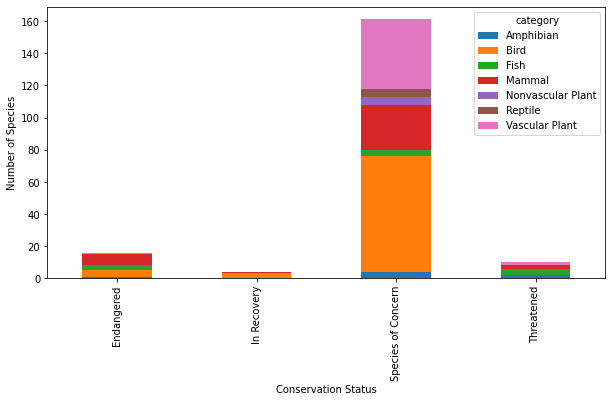

In [29]:
ax = conservation_category.plot(kind='bar', figsize=(10,5), stacked=True)
ax.set_xlabel('Conservation Status')
ax.set_ylabel('Number of Species')

In conservation
Next question is if certain types of species are more likely to be endangered?

This can be answered by creating new column called is_protected and include any species that had a value other than No Intervention.

In [30]:
species['is_protected'] = species.conservation_status != 'No Intervention'
species.head(2)

,category,scientific_name,common_names,conservation_status,is_protected
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Intervention,False
1,Mammal,Bos bison,"American Bison, Bison",No Intervention,False


In [31]:
species['is_protected'].unique()

array([False,  True])

Show the break down of each species type and protection status.

It's easy to see that Bird, Vascular Plant and Mammal have a higher absolute number of species protected.

In [33]:
category_count = species.groupby(['category', 'is_protected'])\
                .scientific_name.nunique()\
                .reset_index()\
                .pivot(columns='is_protected',
                      index='category',
                      values='scientific_name').reset_index()
category_count.columns = ['category', 'not_protected', 'protected']
category_count

,category,not_protected,protected
0,Amphibian,72,7
1,Bird,413,75
2,Fish,115,11
3,Mammal,146,30
4,Nonvascular Plant,328,5
5,Reptile,73,5
6,Vascular Plant,4216,46


Absolute numbers are not always the most usefull statistic. Therefore it's important to calculate the rate of protection that each category exhibits in the data. From this analysis, one can see that 17 percent of mammals were under protection, as well as 15 were

In [34]:
category_count['percent_protected'] = category_count['protected'] / \
                                    (category_count['protected'] + category_count['not_protected'])*100
category_count

,category,not_protected,protected,percent_protected
0,Amphibian,72,7,8.860759
1,Bird,413,75,15.368852
2,Fish,115,11,8.730159
3,Mammal,146,30,17.045455
4,Nonvascular Plant,328,5,1.501502
5,Reptile,73,5,6.410256
6,Vascular Plant,4216,46,1.079305


# Statistical Signifincance
Run some chi-squared test to see if different species have statistically significant difference in conservation status rates. In order to run chi-squared test, a contingency table will need to be created.

The first test will be called contingency1 and will need to be filled with with the correct numbers for mammals and birds.

The second value of chi-squared which is 0.69 is the p-value. Significant threshold 0.05. p-value 0.69 is much larger than significant threshold. In this case mammals and birds don't seem to have any significant relationship between them, i.e the variables independent.

In [35]:
from scipy.stats import chi2_contingency

contingency1 = [[30, 146],
               [75, 413]]
chi2_contingency(contingency1)

(0.1617014831654557,
 0.6875948096661336,
 1,
 array([[ 27.8313253, 148.1686747],
        [ 77.1686747, 410.8313253]]))

Next text is going to test the difference between reptile and mammal.

This time p-value is 0.038 which is below the significant threshold 0.05, the difference between reptile and mammal are statistically signinificant. Mammals are shown to have a statistically significant higher rate of needed protection compare with reptile.

In [36]:
contingency2 = [[30, 146],
               [5, 73]]
chi2_contingency(contingency2)

(4.289183096203645,
 0.03835559022969898,
 1,
 array([[ 24.2519685, 151.7480315],
        [ 10.7480315,  67.2519685]]))

# Species in Park
The next set of analysis will come from data conservations as they have been recording sighthing of different species at several national parks for the last 7 days.

The first step is to look at the common names from to get an idea of the most prevalent animals in the dataset. The data will be need to split up into individual names.

In [38]:
from itertools import chain
import string

def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

common_names = species[species['category'] == 'Mammal']\
                .common_names\
                .apply(remove_punctuations)\
                .str.split().tolist()
common_names[:6]

[['Gappers', 'RedBacked', 'Vole'],
 ['American', 'Bison', 'Bison'],
 ['Aurochs',
  'Aurochs',
  'Domestic',
  'Cattle',
  'Feral',
  'Domesticated',
  'Cattle'],
 ['Domestic', 'Sheep', 'Mouflon', 'Red', 'Sheep', 'Sheep', 'Feral'],
 ['Wapiti', 'Or', 'Elk'],
 ['WhiteTailed', 'Deer']]

In [39]:
cleanRows = []

for item in common_names:
    item = list(dict.fromkeys(item))
    cleanRows.append(item)
    
cleanRows[:6]

[['Gappers', 'RedBacked', 'Vole'],
 ['American', 'Bison'],
 ['Aurochs', 'Domestic', 'Cattle', 'Feral', 'Domesticated'],
 ['Domestic', 'Sheep', 'Mouflon', 'Red', 'Feral'],
 ['Wapiti', 'Or', 'Elk'],
 ['WhiteTailed', 'Deer']]

Next the words need to be collapsed into one list for easier use.

In [40]:
res = list(chain.from_iterable(i if isinstance(i, list) else [i] for i in cleanRows))
res[:6]

['Gappers', 'RedBacked', 'Vole', 'American', 'Bison', 'Aurochs']

Now the data is ready to be able to count the number of occurrences of each word.

From this analysis, it seems the Bat occurred 23 times while shrew came up 18 times.

In [43]:
word_counted = []

for i in res:
    x = res.count(i)
    word_counted.append((i, x))

pd.DataFrame(set(word_counted), columns=['Word', 'Count']).sort_values("Count", ascending=False).head(10)

,Word,Count
148,Bat,23
139,Shrew,18
141,Myotis,17
34,Mouse,16
122,Chipmunk,13
166,Squirrel,12
161,American,12
64,Eastern,11
62,Vole,11
100,Western,10


In the data, there are several different scientific names for different types of bats.

The next task is to figure out which rows of species are referring to bats.

In [44]:
species['is_bat'] = species.common_names.str.contains(r"\bBat\b", regex=True)
species.head()

,category,scientific_name,common_names,conservation_status,is_protected,is_bat
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Intervention,False,False
1,Mammal,Bos bison,"American Bison, Bison",No Intervention,False,False
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",No Intervention,False,False
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention,False,False
4,Mammal,Cervus elaphus,Wapiti Or Elk,No Intervention,False,False


Here is a subset of the data where is_bat is true, returning the matches rows. There are a lot of species of bats, and mix with protected vs. not protected species

In [45]:
species[species.is_bat]

,category,scientific_name,common_names,conservation_status,is_protected,is_bat
28,Mammal,Corynorhinus rafinesquii,Rafinesque's Big-Eared Bat,No Intervention,False,True
29,Mammal,Eptesicus fuscus,Big Brown Bat,Species of Concern,True,True
30,Mammal,Lasionycteris noctivagans,Silver-Haired Bat,Species of Concern,True,True
31,Mammal,Lasiurus borealis,"Eastern Red Bat, Red Bat",No Intervention,False,True
32,Mammal,Lasiurus cinereus,Hoary Bat,No Intervention,False,True
36,Mammal,Myotis leibii,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,True,True
37,Mammal,Myotis lucifugus,"Little Brown Bat, Little Brown Myotis",Species of Concern,True,True
38,Mammal,Myotis septentrionalis,"Northern Long-Eared Bat, Northern Myotis",Threatened,True,True
39,Mammal,Myotis sodalis,"Indiana Bat, Indiana Or Social Myotis",Endangered,True,True
40,Mammal,Nycticeius humeralis,Evening Bat,No Intervention,False,True


Next result is the Bat species will be merged with observations. To create a DataFrame with observations of bats across the four national parks.

In [46]:
bat_observations = observations.merge(species[species.is_bat])
bat_observations

,scientific_name,park_name,observations,category,common_names,conservation_status,is_protected,is_bat
0,Lasiurus blossevillii,Bryce National Park,113,Mammal,Western Red Bat,Species of Concern,True,True
1,Lasiurus blossevillii,Great Smoky Mountains National Park,70,Mammal,Western Red Bat,Species of Concern,True,True
2,Lasiurus blossevillii,Yosemite National Park,123,Mammal,Western Red Bat,Species of Concern,True,True
3,Lasiurus blossevillii,Yellowstone National Park,221,Mammal,Western Red Bat,Species of Concern,True,True
4,Corynorhinus rafinesquii,Yosemite National Park,188,Mammal,Rafinesque's Big-Eared Bat,No Intervention,False,True
...,...,...,...,...,...,...,...,...
139,Myotis sodalis,Yellowstone National Park,68,Mammal,"Indiana Bat, Indiana Or Social Myotis",Endangered,True,True
140,Myotis leibii,Yosemite National Park,132,Mammal,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,True,True
141,Myotis leibii,Bryce National Park,84,Mammal,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,True,True
142,Myotis leibii,Great Smoky Mountains National Park,49,Mammal,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,True,True


Let's see how many total bat observations (all species) were at each national parks.

The total number of bats had been observed in each park the past 7 days shown in table below. Yellowstone National Park has the largest number observations 8,362, while Great Smoky Mountains National Park is the lowest number observations with 2,411 times.

In [47]:
bat_observations.groupby('park_name').observations.sum().reset_index()

,park_name,observations
0,Bryce National Park,3433
1,Great Smoky Mountains National Park,2411
2,Yellowstone National Park,8362
3,Yosemite National Park,4786


Break down each park by protected vs. non protected bat sighthing.

The results show only Great Smoky Mountains National Park has least protected Bats. This is good sign for bats, they are being protected.

In [48]:
obs_by_park = bat_observations.groupby(['park_name', 'is_protected']).observations.sum().reset_index()
obs_by_park


,park_name,is_protected,observations
0,Bryce National Park,False,1596
1,Bryce National Park,True,1837
2,Great Smoky Mountains National Park,False,1299
3,Great Smoky Mountains National Park,True,1112
4,Yellowstone National Park,False,4044
5,Yellowstone National Park,True,4318
6,Yosemite National Park,False,2345
7,Yosemite National Park,True,2441


The plot below from the output of the last data manipulation.

This chart can see that Yellowstone and Bryce National Parks have a great bat populations since there are more sightings of protected bats compared to non-protected species.
The Great Smoky Mountains National Park might need to beef up the efforts in conservation as they have seen more non-protected species.

Text(0.5, 1.0, 'Observations of Bats per Week')

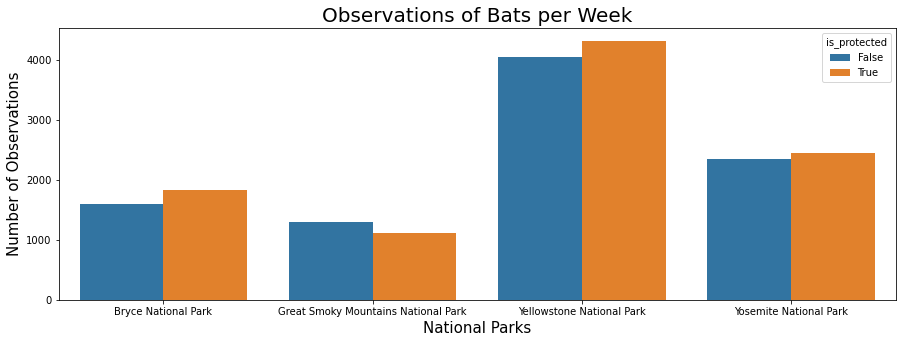

In [49]:
plt.figure(figsize=(15,5))
sns.barplot(data=obs_by_park, x='park_name', y='observations', hue='is_protected')
plt.xlabel('National Parks', fontsize=15)
plt.ylabel('Number of Observations', fontsize=15)
plt.title('Observations of Bats per Week', fontsize=20)

# Conclusions
The project was able to make several data visualizations and inferences about the various species in four of the National Parks that comprised this data set.

This project was also able to answer some of the questions first posed in the beginning:

What is the distribution of conservation status for species? The vast majority of species were not part of conservation.(5,633 vs 191)
Are certain types of species more likely to be endangered? Mammals and Birds had the highest percentage of being in protection.
Are the differences between species and their conservation status significant? While mammals and Birds did not have significant difference in conservation percentage, mammals and reptiles exhibited a -statistically significant difference.
Which animal is most prevalent and what is their distribution amongst parks? the study found that bats occurred the most number of times and they were most likely to be found in Yellowstone National Park.

# Further Research
This dataset only included observations from the last 7 days which prohibits analyze changes over time. It would be curious to see how the conservation status for various species changes over time. Another piece that is missing is the Area of each park, it can be assumed that Yellowstone National Park might be much larger than the other parks which would mean that it would exhibit more observations and greater biodiversity.

Lastly, if precise locations were recorded, the spatial distribution of the species could also be observed and test if these observations are spatially clustered.